# Сверточные нейронные сети (CNN). Распознавание объектов на изображениях.

## Импорт модулей

In [1]:
import numpy
import time
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from IPython.display import Image

Using Theano backend.


In [2]:
# Задаем seed для повторяемости результатов
numpy.random.seed(42)

## Загрузка данных CIFAR-10

Набор данных CIFAR-10 состоит из 60000 цветных изображений размером 32x32 пиксела. Он включает в себя  десять классов (самолет, автомобиль, птица, кот, олень, собака, лягушка, лошадь, корабль, грузовик) по 6000 изображений на каждый класс. Набор разделен на 50000 размеченных изображений (для тренировки алгоритмов обучения с учителем) и 10000 тестовых изображений.
Подробное описание датасета: https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Определение гиперпараметров нейронной сети

In [4]:
# Размер мини-выборки
batch_size = 32

In [5]:
# Количество классов изображений
nb_classes = 10

In [6]:
# Количество эпох для обучения
nb_epoch = 10

In [7]:
# Размер изображений
img_rows, img_cols = 32, 32

In [8]:
# Количество каналов в изображении: RGB
img_channels = 3

## Нормализация и подготовка данных

In [9]:
%%time
# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Wall time: 2.08 s


In [10]:
%%time
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Wall time: 306 ms


## Создание модели сверточной нейронной сети CNN

### Создание модели

Для распознавания изображений из датасета CIFAR-10 воспользуемся сверточной нейронной сетью. Она будет состоять из двух каскадов свертки (каждый из которых будет включать в себя три слоя: два слоя свертки и один слой подвыборки) и классификатора (состоящего из двух полносвязных слоев).

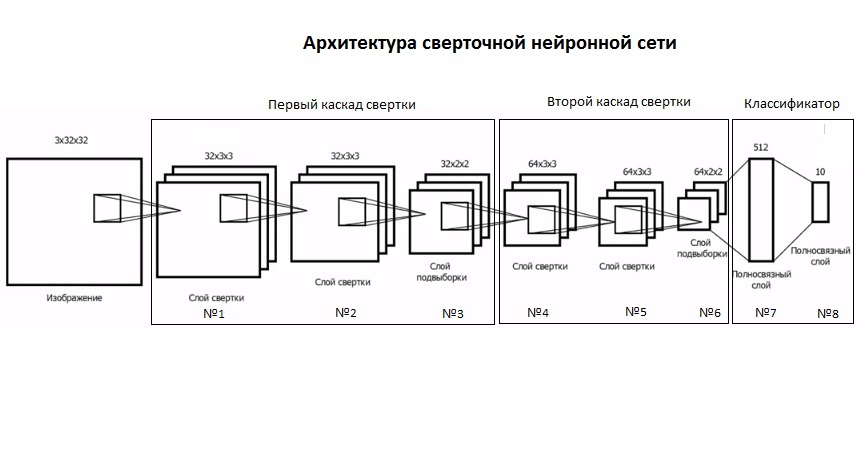

In [11]:
Image(filename='cnn_architecture.jpg')

In [12]:
# Создаем последовательную модель
model = Sequential()

### Создание первого сверточного каскада

In [13]:
# Первый сверточный слой №1
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 input_shape=(img_rows, img_cols, img_channels),
                 activation='relu'))

In [14]:
# Второй сверточный слой №2
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [15]:
# Первый слой подвыборки №3
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Слой регуляризации Dropout
model.add(Dropout(0.25))

### Создание второго сверточного каскада

In [17]:
# Третий сверточный слой №4
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

In [18]:
# Четвертый сверточный слой №5
model.add(Conv2D(64, (3, 3), activation='relu'))

In [19]:
# Второй слой подвыборки №6
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
# Слой регуляризации Dropout
model.add(Dropout(0.25))

### Создание классификатора

In [21]:
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())

In [22]:
# Полносвязный слой для классификации №7
model.add(Dense(512, activation='relu'))

In [23]:
# Слой регуляризации Dropout
model.add(Dropout(0.5))

In [24]:
# Выходной полносвязный слой №8
model.add(Dense(nb_classes, activation='softmax'))

### Полная информация об архитектуре модели

In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Параметры оптимизации модели

In [26]:
# Задаем параметры оптимизации
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

### Компиляция модели

In [27]:
%%time
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Wall time: 191 ms


## Обучение модели сверточной нейронной сети CNN

In [28]:
%%time
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1, 
              shuffle=True,
              verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 1223s 27ms/step - loss: 1.7880 - acc: 0.3411 - val_loss: 1.4036 - val_acc: 0.4840
Epoch 2/10
45000/45000 [==============================] - 1229s 27ms/step - loss: 1.3362 - acc: 0.5165 - val_loss: 1.1658 - val_acc: 0.5928
Epoch 3/10
45000/45000 [==============================] - 1157s 26ms/step - loss: 1.1443 - acc: 0.5911 - val_loss: 1.1735 - val_acc: 0.5942
Epoch 4/10
45000/45000 [==============================] - 1159s 26ms/step - loss: 1.0291 - acc: 0.6343 - val_loss: 0.8784 - val_acc: 0.6980
Epoch 5/10
45000/45000 [==============================] - 1159s 26ms/step - loss: 0.9394 - acc: 0.6674 - val_loss: 0.8892 - val_acc: 0.6892
Epoch 6/10
45000/45000 [==============================] - 1158s 26ms/step - loss: 0.8820 - acc: 0.6921 - val_loss: 0.7421 - val_acc: 0.7468
Epoch 7/10
45000/45000 [==============================] - 1160s 26ms/step - loss: 0.8236 - acc: 0.7079 - val_lo

## Визуализация процесса обучения нейронной сети

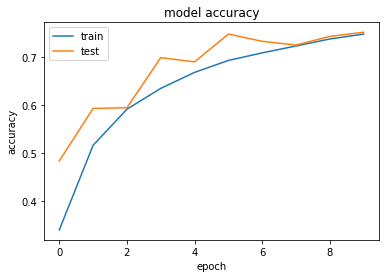

In [29]:
# График точность при обучении
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

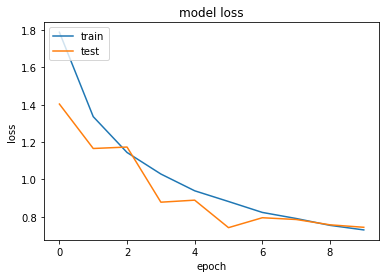

In [30]:
# График потерь при обучении
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Оценка качества обучения нейронной сети на тестовых данных

In [31]:
%%time
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 121s 12ms/step
Wall time: 2min 1s


In [32]:
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 73.54%


Точность модели показывает процент правильно классифицированных объектов.

## Анализ изображений с помощью сверточной нейронной сети

In [33]:
# Список названий классов датасета CIFAR-10
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

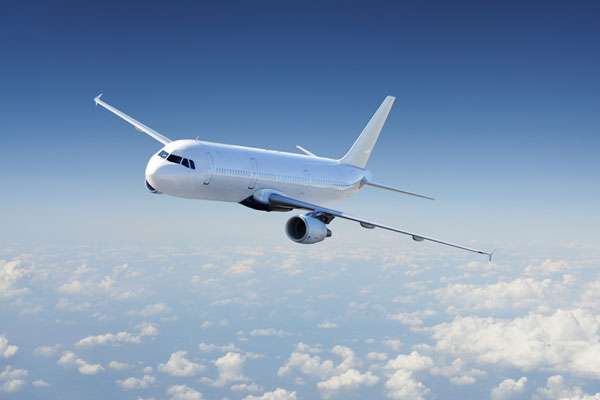

In [34]:
Image(filename='plane.jpg')

In [36]:
from keras.preprocessing import image
# Предобработка изображения
img_plane = image.load_img('plane.jpg', target_size=(32, 32))
x = image.img_to_array(img_plane)
x /= 255
x = numpy.expand_dims(x, axis=0)

In [37]:
# Предсказываем номер класса
preds = model.predict(x)

In [38]:
# Вывод результата
print('На картинке изображен -', classes[numpy.argmax(preds)])

На картинке изображен - самолет


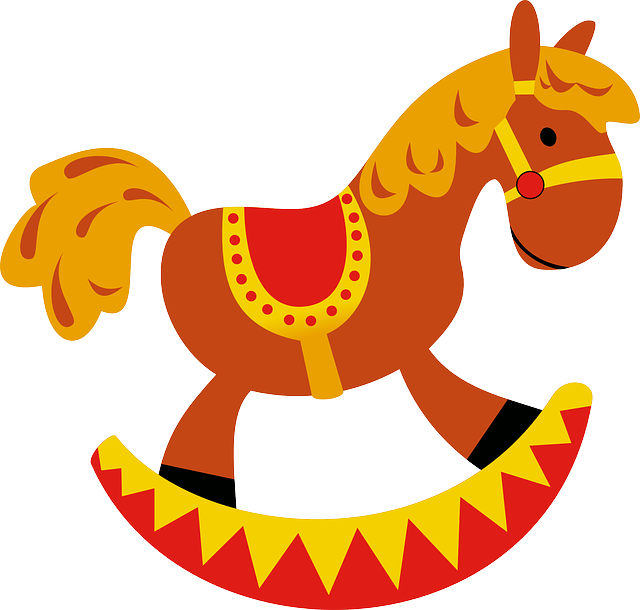

In [46]:
# Загрузка изображения лошади
Image(filename='horse.png')

In [47]:
# Предобработка изображения
img_horse = image.load_img('horse.png', target_size=(32, 32))
x = image.img_to_array(img_horse)
x /= 255
x = numpy.expand_dims(x, axis=0)

In [49]:
# Предсказываем номер класса
preds = model.predict(x)

In [51]:
# Вывод результата
print('На картинке изображен -', classes[numpy.argmax(preds)])

На картинке изображен - лошадь


## Сохранение обученной нейронной сети

После обучения модель может быть сохранена

In [52]:
# Генерируем описание модели в формате json
model_json = model.to_json()
# Записываем модель в файл
json_file = open("cnn_model.json", "w")
json_file.write(model_json)
json_file.close()

In [53]:
# Сохраняем веса нейронной сети
model.save_weights("cnn_model.h5")